                          ______________________________________________________________
                        Для начала, давайте посмотрим на распределение посещений сайта по дням. 
                              Постройте график с распределением количества посещений от
                                ботов и обычных пользователей сайта Яндекс.Метрика.
                                     Данные для построения графика хранятся здесь.
                         ________________________________________________________________

In [349]:
import pandas as pd
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import requests

In [350]:
dates = [date.strftime('%Y-%m-%d') for date in pd.date_range(start='2021-11-01', end='2021-11-06')]

# в задании нам необходимо запросить данные за определённый промежуток времени
# для начала зададим интервал который нас интересует, для этого
# воспользуемся функцией pd.date_range
# куда пропишем начало и конец интересующей даты, их интервал (start='2021-11-01', end='2021-11-06')
# ну и в данном случае мы создадим список с датами указав переменную в которой
# положим то, как нужно перевести в даты [date.strftime('%Y-%m-%d')]
# так как date_range возвращает нам не только даты, но и время, необходимо
# указать форматирование, о котором написано строчкой выше
# тем самым прописав for in
# мы скажем - для каждой(for) даты применить(in) 
# тем самым, то что мы прописывали в ('%Y-%m-%d')
# мы скажем пандасу что необходимо прописывать даты в виде года, месяца и дней
# через дефис именно в таком формате

In [351]:
params = {'m***cs': 'ym:****sits',
         'dim*****ons': 'ym:s:date',
         'dime****ns': 'ym****bot',
         'id': '44*******'}

# длаее для запроса - мы должны указать параметры, и для API яндекс метрики
# и в параметрах мы должны указать то, какие срезы нас интересуют
# какие данные нам требуются и какие метрики мы хотим запросить
# первым делом мы укажем параметр 'metrics' в который необходимо записать
# такое выражение 'ym:s:visits' где ym - это тех. часть для яндекса
# а visits - говорит о том, что нас интересует посещения
# далее в dimensions - мы укажем какие столбцы нас интересуют
# сначала как обычно указывается ym:s: а далее указывается столбик, который мы хотим запросить
# дальше мы указываем свой собственный id

In [352]:
data = pd.read_csv('step_1_lesson_7.csv')

# для того, что бы получить верный ответ на LMS 
# скачаем уже готовые данные, и загрузим их сюда

In [353]:
data
# посмотрим не результат(Он был бы такой же если бы работали с верхней метрикой)

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


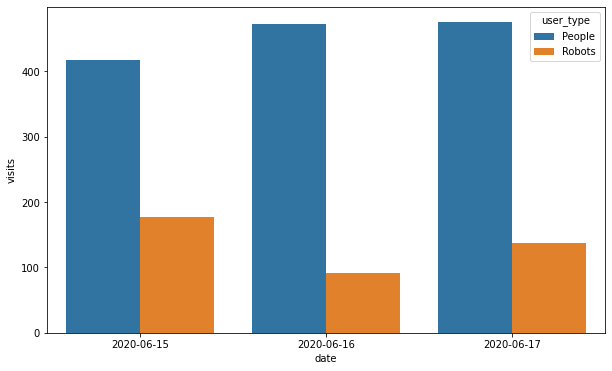

In [354]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=data, x='date', y='visits', hue='user_type', ax=ax)

# построим фигуру
# обозначив что это фигура fig, далее укажем в ax что собираемся 
# задать параметры при помощи функции plt.subplots туда параметры размера фигуры (10, 6)
# далее построим сам график при помощи функции библиотеки sns где укажем что строим barplot 
# где укажем в скобках наш датафрейм, 
# после чего обозначим оси, где по оси x будет колонка date с датой
# по оси y будет колонка с visits с колличеством переходов на сайт
# а дальше укажем по какой колонке будем делить значения hue = 'user_type'
# которая разделит в графике на People(люди) и Robots(боты)

                                 ______________________________________________
                                Определите процент посещений сайта Яндекс.Метрики
                                 с бразузера Google Chrome. Данные лежат здесь.

                                         Ответ округлите до целого.
                                _______________________________________________

In [355]:
data = pd.read_csv('step_2_lesson_7.csv')

In [356]:
data

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0
5,2020-06-15,Opera,16.0
6,2020-06-15,Mobile Safari,16.0
7,2020-06-15,Samsung Internet,9.0
8,2020-06-15,Edge,5.0
9,2020-06-15,UCWEB,4.0


In [357]:
data.loc[data.browser == 'Google Chrome'].visits.iloc[0]

# что бы вычислить наше значение из колонки google chrome
# мы возьмём датафрейм и через функцию .loc пропишем путь к нашему столбцу и значению
# тоесть пропишем в контейнере датафрейм.колонка нужное значение google chrome
# после чего выберем колонку с колличеством посещений, так как оно нас и интересует для данного значения
# а что бы достать только финальное значение нашего вычесления
# мы обратиммся к 0 нулевому значению нашего series и используем iloc

354.0

In [358]:
data_loc = data.loc[data.browser == 'Google Chrome']['visits'].iloc[0] / data.visits.sum() * 100

# далее создадим переменную в которой укажем
# что бы вычислить наше значение из колонки google chrome
# мы возьмём датафрейм и через функцию .loc пропишем путь к нашему столбцу и значению
# тоесть пропишем в контейнере датафрейм.колонка нужное значение google chrome
# после чего выберем колонку с колличеством посещений, 
# так как оно нас и интересует для данного значения ['visits']
# мы обратиммся к 0 нулевому значению нашего series и используем iloc
# и разделим наш датафрейм со значением google chrome и visits на датафрейм с колонкой visits
# применим функцию .sum() для того, что бы получить общее значение колонки visits 
# и после чего умножим * на 100
# для того, что бы получить процент

In [359]:
data_loc.round()

# применим к нашей переменной .round что бы округлить полученное нами значение

60.0

   _______________________________________________________________________________________________________________________
                             Давайте выясним, с какого браузера приходит больше всего ботов. 
                            Посмотрите на данные и определите, у какого браузера самая большая
                          доля посещений сайта ботами от общего числа посещений в этом браузере?

                                     В качестве ответа укажите название браузера.
    ________________________________________________________________________________________________________________________

In [360]:
data = pd.read_csv('https://stepik.org/media/at*****ments/lesson/3*****18/ste*****son_7.csv')

# для начала подгрузим данные по указанной ссылке в задании и запишем данные в переменную

In [361]:
data.head()

# посмотрим результат записи

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [362]:
data.nunique()

# найдём уникальные значения для каждого столбца из нашего датафрейма с помощью
# функции .nunique()

date          1
browser      15
user_type     2
visits       14
dtype: int64

In [363]:
visits_ut_b = data.groupby(['browser', 'user_type']).visits.sum()

# создадим переменную, в которой сгруппируем данные датафрейма по колонкам browser и user_type
# после чего укажем колонку .visits для того, что бы найти значения для каждой колонки
# в каком browser и какие user_type сделало в сумме visits

In [364]:
visits_ut_b.head()

# посмотри на результат нашего подсчёта

browser          user_type
Android Browser  People        1.0
Chrome Mobile    People       31.0
Chromium         People        1.0
                 Robots        1.0
CocCoc           People        1.0
Name: visits, dtype: float64

In [365]:
visits_b = data.groupby(['browser']).visits.sum()

# далее посмотрим в какие браузеры и какое колличество посещений было сделано в общем
# для этого сгруппируем датафрейм по колонке 'browser'
# после чего укажем колонку .visits() из которой нам нужно узнать сумму посещений в общем
# и мы посмотрим в какие browser сколько было сделано visits в сумме sum()

In [366]:
visits_b.head()

# посмотрим на результат

browser
Android Browser     1.0
Chrome Mobile      31.0
Chromium            2.0
CocCoc              1.0
Edge                5.0
Name: visits, dtype: float64

In [367]:
shares = visits_ut_b / visits_b

# далее ранее созданные переменные разделим друг на друга
# что бы получить  данные по типам юзеров и браузеров в сумме на данные только по браузерам
# пандас за нас объединит данные и поделит то, что мы посчитали для роботов и людей по браузерам
# на общее колличество посещений только по браузерам


In [368]:
shares

browser             user_type
Android Browser     People       1.000000
Chrome Mobile       People       1.000000
Chromium            People       0.500000
                    Robots       0.500000
CocCoc              People       1.000000
Edge                People       0.800000
                    Robots       0.200000
Firefox             People       0.465517
                    Robots       0.534483
Google Chrome       People       0.706215
                    Robots       0.293785
Mobile Safari       People       0.937500
                    Robots       0.062500
Opera               People       0.687500
                    Robots       0.312500
Safari              People       0.463415
                    Robots       0.536585
Samsung Internet    People       0.888889
                    Robots       0.111111
UCWEB               Robots       1.000000
Vivaldi             People       1.000000
Yandex Browser      People       0.870370
                    Robots       0.129630
Yand

In [369]:
shares.loc[:, 'Robots'].sort_values(ascending=False)

# далее обратимся к нашим результатам которые выполнили в прошлой ячейке
# используем для этого .loc который позволяет обрабатывать мульти индекс
# тоесть когда у нас в результатах не один уровень, а больше
# мы можем в loc фильтровать по каждому из индексов в 
# соответствующем порядке, тоесть в данном случае мы говорорим пандасу
# что нас интересуют любые браузеры, тоесть - все обозначив это так - [:
# а второй индекс, который отвечает за типы пользователй 'Robots'
# это то самое значение которое было в колнке user_type 
# и говорим что нас интересует значение только равное 'Robots'
# После чего отсортируем наш полученый результат от большего к меньшему, тоесть по убыванию
# тем самым получем браузер, с самой большой долей посещений

browser
UCWEB               1.000000
Safari              0.536585
Firefox             0.534483
Chromium            0.500000
Opera               0.312500
Google Chrome       0.293785
Edge                0.200000
Yandex Browser      0.129630
Samsung Internet    0.111111
Mobile Safari       0.062500
Name: visits, dtype: float64

                       ___________________________________________________________________________________
                         Выгрузите данные, содержащие информацию о дне, типе пользователя, браузере.
                        Создайте колонку с метрикой доли заходов на сайт для каждого из этих разрезов.

                     В ответе укажите процент открытий сайта настоящими пользователями Safari (не ботами)
                                             с точностью до 1 знака после точки.

                         Hint: обратите внимание, здесь вам нужно найти долю заходов конкретных типов
                    пользователей с конкретного браузера от вообще всех-всех заходов на сайт за этот день.
                       ________________________________________________________________________________

In [370]:
df= pd.read_csv('https://stepik.org/media/att***nts/lesson/36****8/step_******_7.csv')

In [371]:
df

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0
5,2020-06-15,Firefox,People,27.0
6,2020-06-15,Safari,Robots,22.0
7,2020-06-15,Safari,People,19.0
8,2020-06-15,Mobile Safari,People,15.0
9,2020-06-15,Opera,People,11.0


In [372]:
df['all_visits'] = df.visits.sum()


# В подсказке в задании сказано, что нам нужно найти долю заходов (visits)
# от общего количества всех заходов на сайт в этот день.
# Поэтому для начала создадим колонку ['all_visits'],
# после чего обратимся к датафрейму и колонке и посчитаем общую сумму посещений visits
# в которую запишем количество посещений в этот день (в данных он один)



In [373]:
df['perc'] = df['visits']/df['all_visits']*100

# Далее – берем колонку visits, делим на общее количество посещений и умножаем на 100, чтобы получить %:
# предварительно создаём в датафрейме ещё одну колонку 'perc'

In [374]:
vc = df.query("user_type == 'People' & browser == 'Safari'")

# Теперь фильтруем данные:
# – user_type == 'People' – нас интересуют настоящие пользователи, а не боты
# – browser == 'Safari' – браузер Safari

# фильтруем данные через функцию .query в которой мы обозначаем
# что user_type должен ровняться значению People, и так же с browser
# задаём переменную, что бы в будущем округлить результат до нужного нам значения

In [375]:
vc
# смотрим результат

,date,browser,user_type,visits,all_visits,perc
7,2020-06-15,Safari,People,19.0,594.0,3.198653


In [376]:
vc.round(1)
# округляем до одного знака после точки взяв датафрейм который 
# посчитали в прошлой ячейке

,date,browser,user_type,visits,all_visits,perc
7,2020-06-15,Safari,People,19.0,594.0,3.2


In [377]:
# ещё можно решить округление таким образом: 
round(df.query("user_type == 'People' & browser == 'Safari'")['perc'], 1)

7    3.2
Name: perc, dtype: float64

                   _______________________________________________________________________________________
                   При помощи библиотеки gspread отправьте данные из предыдущего шага в Google SpreadSheet.
                        Далее отправьте ссылку на получившийся файл в Google SpreadSheet 
           (не забудьте открыть доступ по ссылке, это можно сделать вручную, когда данные уже зальются в таблицу) 
                                        при помощи VK API себе в личку ВКонтакте. 

                                       В ответе напишите слово Да, если всё сделали :)
                    ______________________________________________________________________________________

In [378]:
import pandas as pd
import datetime
import vk_api
import os
import requests
import json

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import sys


In [379]:
scope = ['https://spr****ts.google.com/*****',
         'https://www.googleapis.com/a****h/***']

my_mail = 'nxt**********@gmail.com'

credentials = ServiceAccountCredentials.from_json_keyfile_name('test-367615-********.json', scope)
gs = gspread.authorize(credentials)

# для начала выдаём питону доступ к тем ресурсам, куда он будет ходить
# это google таблицы 
# и google диск
# после чего указываем действующий E-mail куда мы будем заходить nxtmnofficial@gmail.com
# далее мы указываем функцию ServiceAccountCredentials.from_json_keyfile_name
# куда в скобках указывем ключ (Это название текстового файла) и указываем scope
# ну а дальше - просто прохожим авторизацию

In [380]:
SERVISE_ACCOUNT_FILE = 'test-367615-d68e*****234e.json'

# загружаем файил с ключом от google

In [381]:
gc = gspread.service_account(filename=SERVISE_ACCOUNT_FILE)

# далее из библиотеки gspread. мы должны инциализировать service_account
# и передать в скобки файл с нашей ссылкой или путь до нашего ключа


In [382]:
sh = gc.create('project_7_4')

# про помощи метода create у нашего метода gc
# переддим новое название нашей таблицы
# при этом мы создаём переменную, в которую идентифицирует или указывает
# на ту таблицу, которую мы сейчас создаём в гугле 

In [383]:
sh.share('nxtmn*******@gmail.com', perm_type='user', role='writer')

# теперь необходимо пошейрить тоесть дать доступ к файлу себе
# при помощи метода .share у нашего объекта прошлого sh
# передать в share наш e-mail 
# после чего в perm_type говорим то, кому даём доступ
# и в role то, что этот кто-то может делать

In [384]:
worksheet = sh.get_worksheet(0)

In [386]:
link = sh.url

In [388]:
vk_key = '****'

# импортируем токен из вконтакте

In [389]:
vk_session = vk_api.VkApi(token=token)
vk = vk_session.get_api()

# создадим переменную, и из библиотеки vk_api вызовем метод VkApi
# и туда передадим токен (token=token)
# этим способом мы сможем подключить вконтакте напрямую из питона

In [390]:
with open('vk_key') as f:
    token = f.read().strip()
    
# с помощью команды with open говорим 'открой документ' под названием vk_key
# где и лежит наш ключ от токена
# ЭТО ВТОРОЙ СПОСОБ ОТПРАВКИ МОЖНО ОТПРАВЛЯТЬ И ЧЕРЕЗ ССЫЛКУ


In [ ]:
vk.messages.send(
                chat_id = 1,
                random_id = np.random.randint(1, 2 ** 31),
                message = 'Ссылка на google sheets документ отчёта'
)

vk.messages.send(chat_id=1,
                random_id=np.random.randint(1, 2 ** 31),
                message=link)

# Первым способом пропишем простое сообщение (Отсебятина)

# теперь по заданию:
# указываем vk.messages.send
# далее указываем айди чата = 1
# далее идёт (1, 2 ** 31) это генерация случайного числа
# и в message укажем link в который мы ранее записывали ссылку документа